In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [3]:
import os

datasetpath = "/content/drive/MyDrive/brain_tumor"

print(os.listdir(datasetpath))

['Testing', 'Training']


In [4]:
import os
import cv2
import numpy as np

dataset_path = "/content/drive/MyDrive/brain_tumor"

train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Testing")

classes = ["glioma", "meningioma", "notumor", "pituitary"]

data = []
labels = []

# Assign numbers automatically
class_map = {cls:i for i, cls in enumerate(classes)}
print("Class Mapping:", class_map)

for cls in classes:

    folder_path = os.path.join(train_path, cls)

    for img_name in os.listdir(folder_path):

        img_path = os.path.join(folder_path, img_name)

        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.resize(img, (224,224))

        data.append(img)
        labels.append(class_map[cls])


print("✅ Training Images Loaded:", len(data))


Class Mapping: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
✅ Training Images Loaded: 5629


In [5]:
test_data = []
test_labels = []

for cls in classes:

    folder_path = os.path.join(test_path, cls)

    for img_name in os.listdir(folder_path):

        img_path = os.path.join(folder_path, img_name)

        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.resize(img, (224,224))

        test_data.append(img)
        test_labels.append(class_map[cls])



print("✅ Testing Images Loaded:", len(test_data))

✅ Testing Images Loaded: 1615


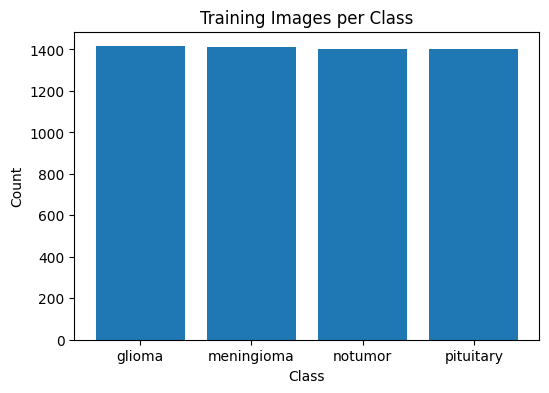

In [6]:
import os

train_path = "/content/drive/MyDrive/brain_tumor/Training"

classes = ["glioma", "meningioma", "notumor", "pituitary"]

counts = []

for cls in classes:
    folder_path = os.path.join(train_path, cls)
    counts.append(len(os.listdir(folder_path)))

plt.figure(figsize=(6,4))
plt.bar(classes, counts)
plt.title("Training Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


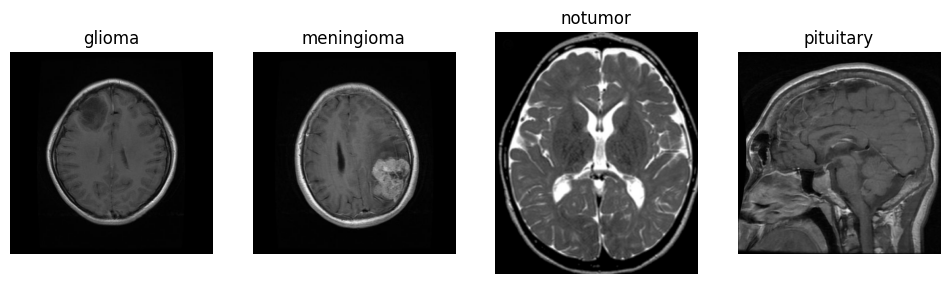

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

base_path = "/content/drive/MyDrive/brain_tumor/Training"
classes = ["glioma", "meningioma", "notumor", "pituitary"]

plt.figure(figsize=(12,8))

for i, cls in enumerate(classes):
    folder_path = os.path.join(base_path, cls)
    img_name = os.listdir(folder_path)[0]   # first image
    img_path = os.path.join(folder_path, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLORMAP_JET)

    plt.subplot(1,4,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.show()


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 5629 images belonging to 4 classes.
Found 1615 images belonging to 4 classes.


In [10]:
categories = ["glioma", "meningioma", "notumor", "pituitary"]

In [11]:
# Set the image size
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 50

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 72s 370ms/step - accuracy: 0.4713 - loss: 1.1289 - val_accuracy: 0.5306 - val_loss: 1.3407
Epoch 2/50
  1/175 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.8438 - loss: 0.5978

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8438 - loss: 0.5978 - val_accuracy: 0.4556 - val_loss: 1.5972
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 59s 339ms/step - accuracy: 0.6744 - loss: 0.8043 - val_accuracy: 0.7006 - val_loss: 1.0837
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.7500 - loss: 0.5277 - val_accuracy: 0.7175 - val_loss: 1.0058
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 76s 339ms/step - accuracy: 0.7225 - loss: 0.7005 - val_accuracy: 0.6881 - val_loss: 1.0569
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.7500 - loss: 0.5834 - val_accuracy: 0.6625 - val_loss: 1.1603
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 60s 340ms/step - accuracy: 0.7912 - loss: 0.5461 - val_accuracy: 0.7825 - val_loss: 0.8007
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8438 - loss: 0.4336 - val_accuracy: 0.7688 - val_loss: 0.8563
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 75s 336ms/step - accuracy: 0.8129 - loss: 0.4714 - val_accurac

In [14]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // 32)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.8093 - loss: 1.6626
Test Loss: 0.7973365187644958
Test Accuracy: 0.9006249904632568


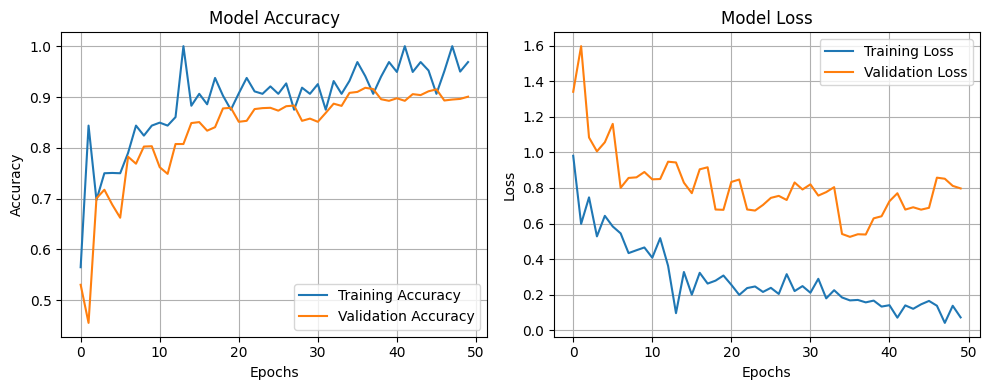

In [15]:
# Accuracy plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step


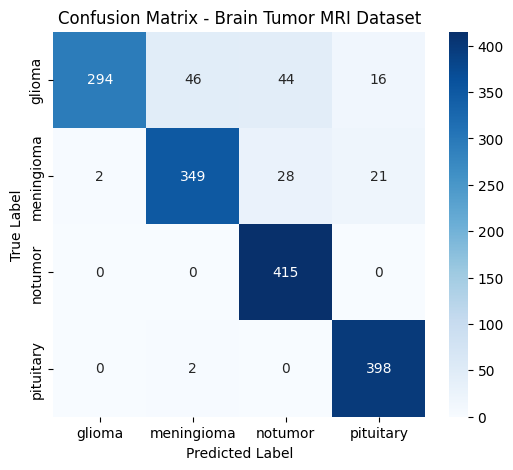

In [16]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)

class_names = ["glioma", "meningioma", "notumor", "pituitary"]

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Brain Tumor MRI Dataset")
plt.show()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred_classes,
    target_names=class_names
))

              precision    recall  f1-score   support

      glioma       0.99      0.73      0.84       400
  meningioma       0.88      0.87      0.88       400
     notumor       0.85      1.00      0.92       415
   pituitary       0.91      0.99      0.95       400

    accuracy                           0.90      1615
   macro avg       0.91      0.90      0.90      1615
weighted avg       0.91      0.90      0.90      1615



In [22]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [23]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,363,982 (39.54 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,909,322 (26.36 MB)

In [81]:
img_path = "/content/drive/MyDrive/brain_tumor/Testing/meningioma/Te-aug-me_1.jpg"

img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [82]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, class_index):



    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[
            model.get_layer(last_conv_layer_name).output,
            model.outputs[0]
        ]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array, training=False)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) + 1e-8

    return heatmap.numpy()

In [83]:
img = cv2.imread(img_path)

if img is None:
    raise ValueError("Image not loaded")

img = cv2.resize(img, (150, 150))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_array = img_rgb / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [84]:
preds = model.predict(img_array)
predicted_class = np.argmax(preds)

print("Predicted class:", predicted_class)
print("Confidence:", preds[0][predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: 1
Confidence: 0.9157788


In [90]:
heatmap = make_gradcam_heatmap(
    img_array,
    model,
    last_conv_layer_name="conv2d_3",
    class_index=predicted_class
)

In [95]:
heatmap = cv2.resize(heatmap, (150, 150))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(img, 0.85, heatmap, 0.5,0)

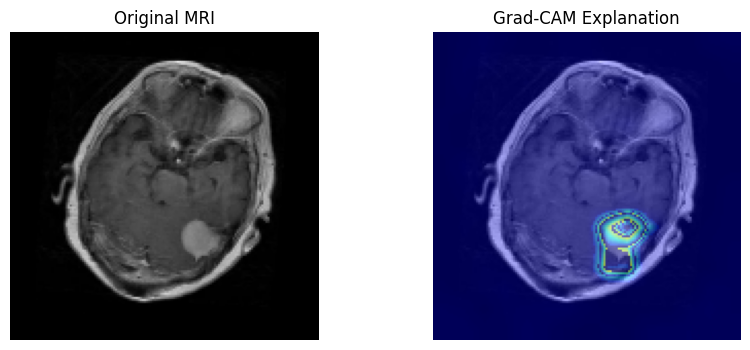

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original MRI")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Grad-CAM Explanation")
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()